In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split

#### Data Preprocessing

In [2]:
data=pd.read_csv(r"/content/new dddddd.csv")
data.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,ThreewayCalls,...,AgeHH2,ChildrenInHH,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,IncomeGroup,CreditRating,Unnamed: 25,Occupation,MaritalStatus
0,3000006,57.49,483.0,37.0,23.0,0.0,532.0,51.0,8.3,0.3,...,0.0,No,Yes,Yes,No,5,5-Low,NaN,Other,No
1,3000018,55.23,570.0,72.0,0.0,0.0,38.0,0.0,9.7,0.0,...,0.0,No,No,No,No,6,1-Highest,NaN,Professional,No
2,3000034,97.34,1039.0,50.0,420.0,0.0,198.0,23.3,12.7,0.3,...,24.0,No,No,No,No,4,3-Good,NaN,Crafts,Yes
3,3000070,35.59,153.0,30.0,16.0,0.0,30.0,7.3,2.0,0.0,...,0.0,Yes,Yes,Yes,Yes,4,1-Highest,NaN,Other,No
4,3000074,55.27,1213.0,50.0,0.0,1.3,169.0,1.0,2.7,0.0,...,0.0,No,Yes,Yes,No,3,1-Highest,NaN,Other,No


In [3]:
data['MaritalStatus'].unique

<bound method Series.unique of 0             No
1             No
2            Yes
3             No
4             No
          ...   
19995    Unknown
19996        Yes
19997         No
19998    Unknown
19999        Yes
Name: MaritalStatus, Length: 20000, dtype: object>

In [4]:
descriptive_stats = data.describe()
print(descriptive_stats)

         CustomerID  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
count  2.000000e+04    19940.000000    19940.000000          19940.000000   
mean   3.201925e+06       58.899712      525.912136             46.946640   
std    1.165204e+05       43.564203      530.825481             24.083351   
min    3.000006e+06        0.000000        0.000000              0.000000   
25%    3.100522e+06       33.720000      159.000000             30.000000   
50%    3.201338e+06       48.665000      365.000000             45.000000   
75%    3.304237e+06       70.882500      718.000000             60.000000   
max    3.399986e+06      635.060000     7668.000000            350.000000   

       OverageMinutes  RoamingCalls  PercChangeMinutes  PercChangeRevenues  \
count    19940.000000  19940.000000       19865.000000        19865.000000   
mean        40.240722      1.186765          -9.052806           -1.237246   
std         95.740506      6.848963         249.609021           36.6382

In [5]:
data.drop('Unnamed: 25', axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            20000 non-null  int64  
 1   MonthlyRevenue        19940 non-null  float64
 2   MonthlyMinutes        19940 non-null  float64
 3   TotalRecurringCharge  19940 non-null  float64
 4   OverageMinutes        19940 non-null  float64
 5   RoamingCalls          19940 non-null  float64
 6   PercChangeMinutes     19865 non-null  float64
 7   PercChangeRevenues    19865 non-null  float64
 8   DroppedCalls          20000 non-null  float64
 9   ThreewayCalls         20000 non-null  float64
 10  ReceivedCalls         20000 non-null  float64
 11  OutboundCalls         20000 non-null  float64
 12  MonthsInService       20000 non-null  int64  
 13  UniqueSubs            20000 non-null  int64  
 14  ActiveSubs            20000 non-null  int64  
 15  ServiceArea        

In [7]:
data.isna().sum()

CustomerID                0
MonthlyRevenue           60
MonthlyMinutes           60
TotalRecurringCharge     60
OverageMinutes           60
RoamingCalls             60
PercChangeMinutes       135
PercChangeRevenues      135
DroppedCalls              0
ThreewayCalls             0
ReceivedCalls             0
OutboundCalls             0
MonthsInService           0
UniqueSubs                0
ActiveSubs                0
ServiceArea               4
CurrentEquipmentDays      0
AgeHH1                  335
AgeHH2                  335
ChildrenInHH              0
BuysViaMailOrder          0
RespondsToMailOffers      0
OptOutMailings            0
IncomeGroup               0
CreditRating              0
Occupation                0
MaritalStatus             0
dtype: int64

In [8]:
data['ServiceArea'].fillna(data['ServiceArea'].mode()[0], inplace=True)

In [9]:
col = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'OverageMinutes', 'RoamingCalls','PercChangeMinutes','PercChangeRevenues']
data[col] = data[col].fillna(0)

In [10]:
data.isna().sum()

CustomerID                0
MonthlyRevenue            0
MonthlyMinutes            0
TotalRecurringCharge      0
OverageMinutes            0
RoamingCalls              0
PercChangeMinutes         0
PercChangeRevenues        0
DroppedCalls              0
ThreewayCalls             0
ReceivedCalls             0
OutboundCalls             0
MonthsInService           0
UniqueSubs                0
ActiveSubs                0
ServiceArea               0
CurrentEquipmentDays      0
AgeHH1                  335
AgeHH2                  335
ChildrenInHH              0
BuysViaMailOrder          0
RespondsToMailOffers      0
OptOutMailings            0
IncomeGroup               0
CreditRating              0
Occupation                0
MaritalStatus             0
dtype: int64

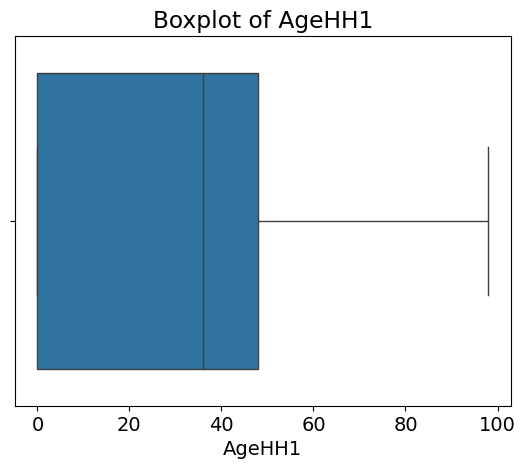

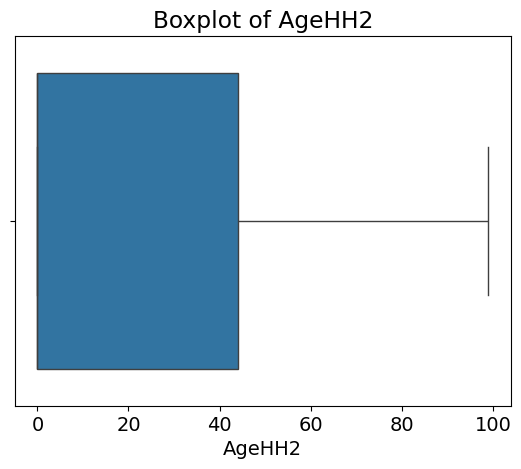

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=data['AgeHH1'])
plt.title('Boxplot of AgeHH1')
plt.show()

sns.boxplot(x=data['AgeHH2'])
plt.title('Boxplot of AgeHH2')
plt.show()

In [12]:
data['AgeHH1'].fillna(data['AgeHH1'].mean(), inplace=True)
data['AgeHH2'].fillna(data['AgeHH2'].mean(), inplace=True)

In [13]:
data['AgeHH1'] = data['AgeHH1'].round().astype(int)
data['AgeHH2'] = data['AgeHH2'].round().astype(int)

In [14]:
data.drop(data[data['AgeHH1'] == 0].index, inplace=True)
data.AgeHH1.unique()

array([30, 56, 38, 46, 58, 50, 60, 54, 32, 24, 40, 28, 52, 34, 42, 48, 64,
       36, 70, 31, 66, 22, 44, 26, 62, 68, 72, 80, 76, 98, 74, 78, 82, 84,
       20, 18, 86, 88, 90, 96, 92, 94])

In [15]:
data.isna().sum()

CustomerID              0
MonthlyRevenue          0
MonthlyMinutes          0
TotalRecurringCharge    0
OverageMinutes          0
RoamingCalls            0
PercChangeMinutes       0
PercChangeRevenues      0
DroppedCalls            0
ThreewayCalls           0
ReceivedCalls           0
OutboundCalls           0
MonthsInService         0
UniqueSubs              0
ActiveSubs              0
ServiceArea             0
CurrentEquipmentDays    0
AgeHH1                  0
AgeHH2                  0
ChildrenInHH            0
BuysViaMailOrder        0
RespondsToMailOffers    0
OptOutMailings          0
IncomeGroup             0
CreditRating            0
Occupation              0
MaritalStatus           0
dtype: int64

In [16]:
#data.drop('Unnamed: 25', axis=1, inplace=True)


In [17]:
data.head(10)

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,ThreewayCalls,...,AgeHH1,AgeHH2,ChildrenInHH,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,IncomeGroup,CreditRating,Occupation,MaritalStatus
0,3000006,57.49,483.0,37.0,23.0,0.0,532.0,51.0,8.3,0.3,...,30,0,No,Yes,Yes,No,5,5-Low,Other,No
1,3000018,55.23,570.0,72.0,0.0,0.0,38.0,0.0,9.7,0.0,...,56,0,No,No,No,No,6,1-Highest,Professional,No
2,3000034,97.34,1039.0,50.0,420.0,0.0,198.0,23.3,12.7,0.3,...,38,24,No,No,No,No,4,3-Good,Crafts,Yes
3,3000070,35.59,153.0,30.0,16.0,0.0,30.0,7.3,2.0,0.0,...,46,0,Yes,Yes,Yes,Yes,4,1-Highest,Other,No
4,3000074,55.27,1213.0,50.0,0.0,1.3,169.0,1.0,2.7,0.0,...,58,0,No,Yes,Yes,No,3,1-Highest,Other,No
5,3000086,60.19,1424.0,56.0,0.0,0.0,-1134.0,-55.2,23.7,0.0,...,50,52,No,Yes,Yes,No,5,5-Low,Other,Yes
7,3000110,37.66,972.0,36.0,5.0,0.0,25.0,-1.7,4.0,0.0,...,60,0,No,No,No,No,1,1-Highest,Other,No
8,3000246,42.88,406.0,40.0,54.0,0.0,88.0,3.6,0.7,0.0,...,50,48,Yes,Yes,Yes,No,5,4-Medium,Professional,Yes
10,3000258,54.96,244.0,52.0,0.0,0.0,15.0,2.0,0.7,0.0,...,54,80,No,Yes,Yes,No,6,1-Highest,Professional,No
11,3000274,50.48,380.0,60.0,0.0,0.0,93.0,-0.5,4.0,0.0,...,46,48,Yes,Yes,Yes,No,6,1-Highest,Professional,Yes


In [18]:
data.corr()

<ipython-input-18-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,MonthsInService,UniqueSubs,ActiveSubs,CurrentEquipmentDays,AgeHH1,AgeHH2,IncomeGroup
CustomerID,1.000000,-0.015983,0.063236,0.035187,-0.004151,-0.001913,0.000668,0.012079,0.037821,0.036480,0.029856,0.032392,-0.743838,-0.012701,-0.014310,-0.395650,-0.031524,-0.030302,-0.086569
MonthlyRevenue,-0.015983,1.000000,0.714089,0.661560,0.796416,0.257273,-0.006568,-0.017922,0.456724,0.206420,0.616554,0.520062,0.006566,-0.011379,-0.036273,-0.223503,-0.106134,-0.078059,-0.059932
MonthlyMinutes,0.063236,0.714089,1.000000,0.577382,0.563006,0.113969,-0.014486,-0.026237,0.608626,0.290701,0.842102,0.710112,-0.053162,-0.024509,-0.053857,-0.304863,-0.143705,-0.108314,-0.104488
TotalRecurringCharge,0.035187,0.661560,0.577382,1.000000,0.200150,0.096764,-0.005166,-0.027573,0.352695,0.135337,0.487356,0.411277,-0.048117,-0.011549,-0.043624,-0.251081,-0.093062,-0.073565,-0.039147
OverageMinutes,-0.004151,0.796416,0.563006,0.200150,1.000000,0.066251,-0.007967,-0.001212,0.359935,0.175653,0.507428,0.413451,0.002421,-0.007950,-0.020705,-0.127241,-0.075501,-0.051926,-0.048105
RoamingCalls,-0.001913,0.257273,0.113969,0.096764,0.066251,1.000000,-0.037651,-0.076086,0.082019,0.014288,0.064624,0.056878,-0.009574,-0.000291,0.003287,-0.036621,-0.015606,-0.004617,-0.011964
PercChangeMinutes,0.000668,-0.006568,-0.014486,-0.005166,-0.007967,-0.037651,1.000000,0.595639,-0.075125,-0.010155,-0.092313,-0.056323,-0.003673,0.010432,0.008671,-0.014985,-0.008351,0.008104,-0.001120
PercChangeRevenues,0.012079,-0.017922,-0.026237,-0.027573,-0.001212,-0.076086,0.595639,1.000000,-0.055453,-0.016275,-0.058360,-0.052865,-0.012517,-0.002395,0.002038,0.001704,-0.004234,-0.000080,-0.000643
DroppedCalls,0.037821,0.456724,0.608626,0.352695,0.359935,0.082019,-0.075125,-0.055453,1.000000,0.272877,0.540628,0.584376,-0.028339,-0.005622,-0.028083,-0.209291,-0.081575,-0.076774,-0.057352
ThreewayCalls,0.036480,0.206420,0.290701,0.135337,0.175653,0.014288,-0.010155,-0.016275,0.272877,1.000000,0.249462,0.241255,-0.042772,-0.009494,-0.011344,-0.109970,-0.013369,-0.046850,-0.069308


#### Exploring Customer Segmentation: Monthly Revenue, Monthly Minutes, and AgeHH1 Clustering Analysis

In [19]:
X=data[["MonthlyRevenue","MonthlyMinutes","AgeHH1"]]
X

,MonthlyRevenue,MonthlyMinutes,AgeHH1
0,57.49,483.0,30
1,55.23,570.0,56
2,97.34,1039.0,38
3,35.59,153.0,46
4,55.27,1213.0,58
...,...,...,...
19994,0.00,0.0,46
19995,85.15,815.0,64
19996,0.00,0.0,34
19998,0.00,0.0,28


In [20]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

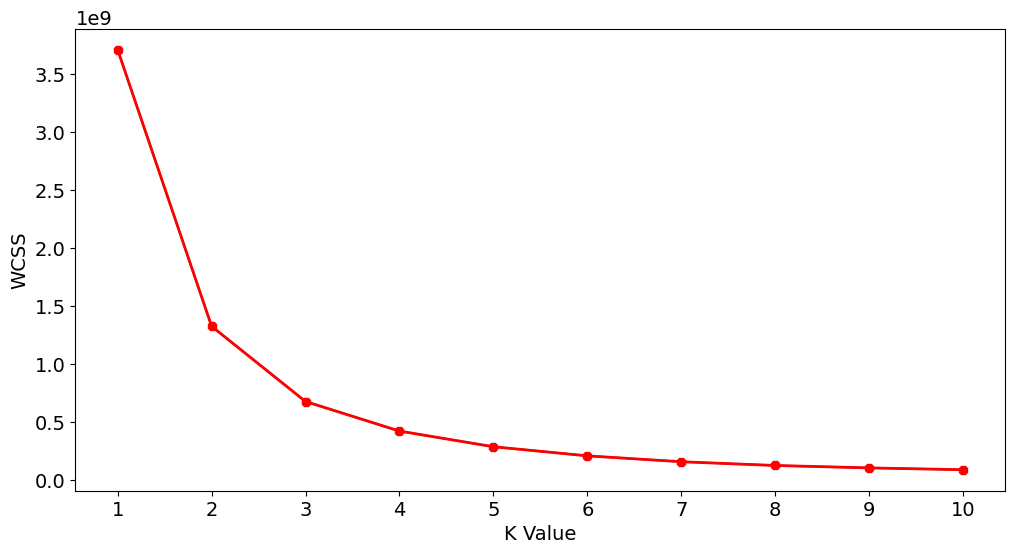

In [21]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In the context of clustering algorithms like k-means, "k" represents the number of clusters you want to partition your data into. Selecting the right value for "k" is crucial, as it directly impacts the results of the clustering analysis.
The optimal "k" value depends on the underlying structure of your data. Too few clusters may oversimplify the patterns, while too many may create artificial groupings.

In [22]:
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 1, ..., 0, 0, 0], dtype=int32)

K-means is a popular clustering algorithm that aims to partition a dataset into "k" clusters based on similarity.
The algorithm works iteratively to assign data points to clusters and update the cluster centroids until convergence.
It minimizes the within-cluster sum of squares, seeking to create clusters where the variance within each cluster is minimized.

### K-means

1. **Initialization:**
   - Choose the number of clusters (k) that you want to form.
   - Randomly initialize the centroids of the k clusters. A centroid is the mean position of all the points in a cluster.

2. **Assign Points to Clusters:**
   - For each data point, calculate the distance to each centroid.
   - Assign the data point to the cluster whose centroid is the closest (typically using Euclidean distance).

3. **Update Cluster Centroids:**
   - Recalculate the centroids of each cluster by taking the mean of all the data points assigned to that cluster.

4. **Repeat:**
   - Repeat steps 2 and 3 until convergence is reached. Convergence occurs when the assignment of points to clusters and the positions of the centroids no longer change significantly.

5. **Result:**
   - The algorithm converges to a final state where each data point is assigned to one of the k clusters, and the centroids represent the mean positions of the points in each cluster.

**Key Points:**

- **Initialization Sensitivity:**
  - K-means is sensitive to the initial placement of centroids. Different initializations may lead to different final results.

- **Convergence Criteria:**
  - Convergence is often determined by a lack of significant changes in cluster assignments or centroid positions over iterations.

- **Choice of "k":**
  - Selecting the appropriate number of clusters (k) is crucial. The elbow method or silhouette score are common techniques to find an optimal value for k.

- **Euclidean Distance:**
  - Euclidean distance is commonly used to measure the distance between data points and cluster centroids, but other distance metrics can be used based on the nature of the data.

- **Scalability:**
  - K-means can be computationally efficient, but its performance may degrade with large datasets or high dimensions.

- **Cluster Shape:**
  - K-means assumes that clusters are spherical and equally sized. As a result, it may not perform well on datasets with irregularly shaped or differently sized clusters.

In [23]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.5807005141854775


**Mathematical Intuition:**

The Silhouette Score for a single data point is calculated as follows:

1. **a(i):** The average distance from the ith data point to the other data points within the same cluster. It represents cohesion.

2. **b(i):** The smallest average distance from the ith data point to data points in a different cluster, minimized over clusters. It represents separation.

3. The Silhouette Score for the ith data point is given by:  
   \[ \text{Silhouette Score}(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}} \]

4. The overall Silhouette Score for the entire clustering is the average of the Silhouette Scores for all data points.

**Interpretation:**

- If the Silhouette Score is close to 1, it indicates that the data point is well matched to its own cluster and poorly matched to neighboring clusters.

- If the Silhouette Score is close to -1, it suggests that the data point is better matched to a neighboring cluster than its own.

- A Silhouette Score around 0 indicates overlapping clusters.

**Importance:**

- Higher Silhouette Scores (close to 1) suggest a better-defined clustering.

- It provides a quantitative measure for choosing the optimal number of clusters (k) in algorithms like k-means.

- Helps assess the overall quality of clustering, guiding model selection and hyperparameter tuning.

In [24]:
df_plot = X
df_plot['cluster'] = y_kmeans
df_plot['CustomerID']=data['CustomerID']
df_plot

<ipython-input-24-74474e709b22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['cluster'] = y_kmeans
<ipython-input-24-74474e709b22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['CustomerID']=data['CustomerID']


,MonthlyRevenue,MonthlyMinutes,AgeHH1,cluster,CustomerID
0,57.49,483.0,30,2,3000006
1,55.23,570.0,56,2,3000018
2,97.34,1039.0,38,1,3000034
3,35.59,153.0,46,0,3000070
4,55.27,1213.0,58,1,3000074
...,...,...,...,...,...
19994,0.00,0.0,46,0,3399930
19995,85.15,815.0,64,2,3399938
19996,0.00,0.0,34,0,3399950
19998,0.00,0.0,28,0,3399970


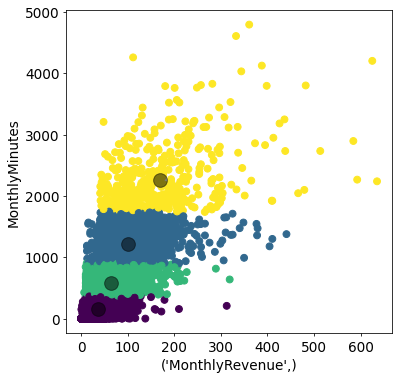

In [25]:
import matplotlib.pyplot as plt
df_scatter = np.array(df_plot)
plt.figure(figsize=(6, 6), dpi=70)
plt.scatter(df_scatter[:,0], df_scatter[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='black', s=200, alpha=0.5, label ='centroid');
xlabel='MonthlyRevenue',
ylabel='MonthlyMinutes'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

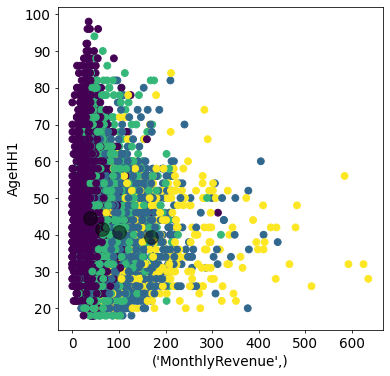

In [26]:
import matplotlib.pyplot as plt
df_scatter = np.array(df_plot)
plt.figure(figsize=(6, 6), dpi=70)
plt.scatter(X['MonthlyRevenue'], X['AgeHH1'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,2], c='black', s=200, alpha=0.5, label ='centroid');
xlabel='MonthlyRevenue',
ylabel='AgeHH1'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

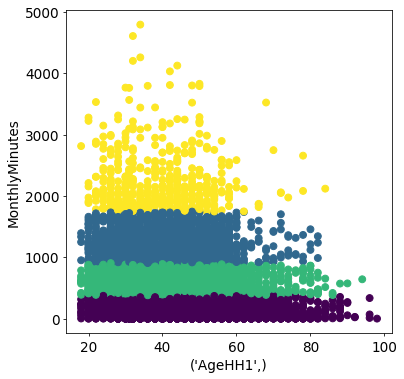

In [27]:
import matplotlib.pyplot as plt
df_scatter = np.array(df_plot)
plt.figure(figsize=(6, 6), dpi=70)
plt.scatter(X['AgeHH1'], X['MonthlyMinutes'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:,2], c='black', s=200, alpha=0.5, label ='centroid');
xlabel='AgeHH1',
ylabel='MonthlyMinutes'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

In [28]:
import plotly.express as px
fig = px.scatter_3d(df_plot, x='MonthlyRevenue', y='MonthlyMinutes', z='AgeHH1', color='cluster', opacity=1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [31]:
custX0=df_plot[df_plot["cluster"]==0]
print('Number of customer in 0st group=', len(custX0))
print('They are -', custX0["CustomerID"].values)
print("--------------------------------------------")
custX1=df_plot[df_plot["cluster"]==1]
print('Number of customer in 1st group=', len(custX1))
print('They are -', custX1["CustomerID"].values)
print("--------------------------------------------")
custX2=df_plot[df_plot["cluster"]==2]
print('Number of customer in 2nd group=', len(custX2))
print('They are -', custX2["CustomerID"].values)
print("--------------------------------------------")
custX3=df_plot[df_plot["cluster"]==3]
print('Number of customer in 3rd group=', len(custX3))
print('They are -', custX3["CustomerID"].values)
print("--------------------------------------------")


Number of customer in 0st group= 7992
They are - [3000070 3000258 3000366 ... 3399950 3399970 3399986]
--------------------------------------------
Number of customer in 1st group= 1749
They are - [3000034 3000074 3000086 ... 3398566 3398606 3398850]
--------------------------------------------
Number of customer in 2nd group= 4398
They are - [3000006 3000018 3000246 ... 3399294 3399862 3399938]
--------------------------------------------
Number of customer in 3rd group= 461
They are - [3000342 3000702 3000754 3000798 3001042 3001362 3001538 3001622 3001778
 3001994 3002150 3002238 3002550 3002566 3003290 3003770 3003826 3004422
 3004806 3006094 3006782 3007514 3009582 3009938 3010514 3010926 3010942
 3011714 3012734 3012990 3013726 3013770 3014230 3014662 3016018 3016038
 3016246 3018610 3020342 3021154 3021294 3022770 3023054 3023366 3024570
 3025422 3025830 3025890 3026182 3027930 3029046 3029906 3032398 3034294
 3034446 3034458 3034846 3035594 3036274 3037650 3038566 3039222 30425

In [32]:
mean_values = custX0[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].mean()
median_values = custX0[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].median()
std_dev_values = custX0[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].std()
min_values = custX0[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].min()
max_values = custX0[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].max()
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard deviation values:\n", std_dev_values)
print("\nMinimum values:\n", min_values)
print("\nMaximum values:\n", max_values)

Mean values:
 MonthlyRevenue     37.258968
MonthlyMinutes    162.178679
AgeHH1             44.700826
dtype: float64

Median values:
 MonthlyRevenue     34.73
MonthlyMinutes    155.00
AgeHH1             44.00
dtype: float64

Standard deviation values:
 MonthlyRevenue     17.459486
MonthlyMinutes    108.486060
AgeHH1             12.538374
dtype: float64

Minimum values:
 MonthlyRevenue     0.0
MonthlyMinutes     0.0
AgeHH1            18.0
dtype: float64

Maximum values:
 MonthlyRevenue    312.46
MonthlyMinutes    377.00
AgeHH1             98.00
dtype: float64


Targeting Approach: Focus on customer retention and satisfaction. Offer personalized plans that match their average usage patterns.

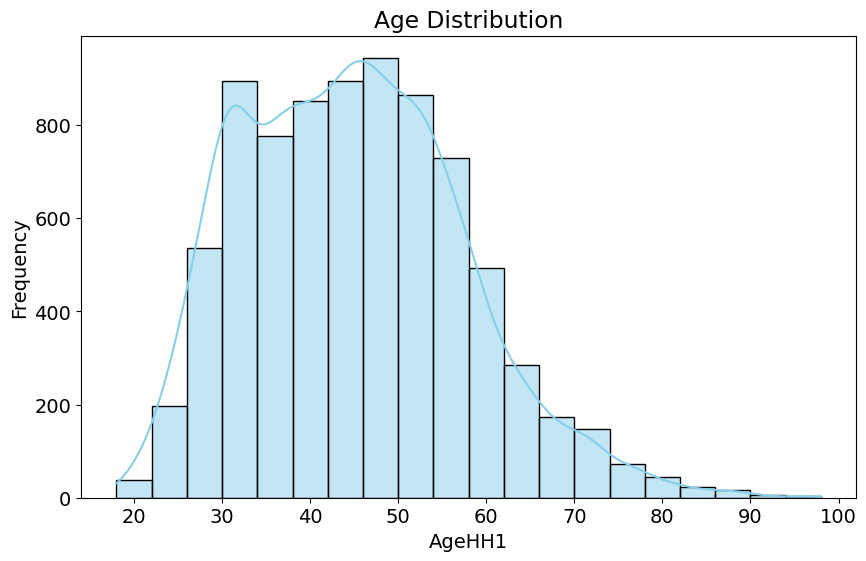

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(custX0['AgeHH1'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('AgeHH1')
plt.ylabel('Frequency')
plt.show()

In [34]:
custX0

,MonthlyRevenue,MonthlyMinutes,AgeHH1,cluster,CustomerID
3,35.59,153.0,46,0,3000070
10,54.96,244.0,54,0,3000258
15,40.71,365.0,32,0,3000366
18,30.26,25.0,46,0,3000450
20,33.85,225.0,52,0,3000482
...,...,...,...,...,...
19989,41.84,351.0,38,0,3399854
19994,0.00,0.0,46,0,3399930
19996,0.00,0.0,34,0,3399950
19998,0.00,0.0,28,0,3399970


In [35]:
custX0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7992 entries, 3 to 19999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MonthlyRevenue  7992 non-null   float64
 1   MonthlyMinutes  7992 non-null   float64
 2   AgeHH1          7992 non-null   int64  
 3   cluster         7992 non-null   int32  
 4   CustomerID      7992 non-null   int64  
dtypes: float64(2), int32(1), int64(2)
memory usage: 343.4 KB


In [36]:
descriptive_stats = custX0[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].describe()
print(descriptive_stats)


       MonthlyRevenue  MonthlyMinutes       AgeHH1
count     7992.000000     7992.000000  7992.000000
mean        37.258968      162.178679    44.700826
std         17.459486      108.486060    12.538374
min          0.000000        0.000000    18.000000
25%         29.990000       65.750000    34.000000
50%         34.730000      155.000000    44.000000
75%         45.135000      251.000000    52.000000
max        312.460000      377.000000    98.000000


In [37]:
mean_values = custX1[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].mean()
median_values = custX1[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].median()
std_dev_values = custX1[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].std()
min_values = custX1[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].min()
max_values = custX1[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].max()
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard deviation values:\n", std_dev_values)
print("\nMinimum values:\n", min_values)
print("\nMaximum values:\n", max_values)


Mean values:
 MonthlyRevenue      99.638776
MonthlyMinutes    1218.674671
AgeHH1              40.716981
dtype: float64

Median values:
 MonthlyRevenue      90.37
MonthlyMinutes    1174.00
AgeHH1              40.00
dtype: float64

Standard deviation values:
 MonthlyRevenue     50.910008
MonthlyMinutes    232.357426
AgeHH1             11.700273
dtype: float64

Minimum values:
 MonthlyRevenue     12.5
MonthlyMinutes    901.0
AgeHH1             18.0
dtype: float64

Maximum values:
 MonthlyRevenue     440.69
MonthlyMinutes    1744.00
AgeHH1              82.00
dtype: float64


Targeting Approach: Highlight premium services, exclusive features, and high-speed data options. Tailor marketing towards customers who value extensive usage and premium offerings.

In [38]:
mean_values = custX2[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].mean()
median_values = custX2[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].median()
std_dev_values = custX2[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].std()
min_values = custX2[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].min()
max_values = custX2[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].max()
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard deviation values:\n", std_dev_values)
print("\nMinimum values:\n", min_values)
print("\nMaximum values:\n", max_values)

Mean values:
 MonthlyRevenue     63.471919
MonthlyMinutes    586.628695
AgeHH1             41.527740
dtype: float64

Median values:
 MonthlyRevenue     57.68
MonthlyMinutes    564.00
AgeHH1             40.00
dtype: float64

Standard deviation values:
 MonthlyRevenue     28.021221
MonthlyMinutes    147.679746
AgeHH1             12.031534
dtype: float64

Minimum values:
 MonthlyRevenue      6.62
MonthlyMinutes    374.00
AgeHH1             18.00
dtype: float64

Maximum values:
 MonthlyRevenue    318.86
MonthlyMinutes    906.00
AgeHH1             94.00
dtype: float64


Targeting Approach: Emphasize value for money, customized plans, and excellent customer service. Appeal to customers looking for a balance between cost and usage.
limited-time promotions to encourage upselling. Provide discounts for referrals to expand the customer base.


In [39]:
mean_values = custX3[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].mean()
median_values = custX3[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].median()
std_dev_values = custX3[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].std()
min_values = custX3[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].min()
max_values = custX3[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].max()
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard deviation values:\n", std_dev_values)
print("\nMinimum values:\n", min_values)
print("\nMaximum values:\n", max_values)

Mean values:
 MonthlyRevenue     168.411367
MonthlyMinutes    2263.824295
AgeHH1              39.325380
dtype: float64

Median values:
 MonthlyRevenue     147.83
MonthlyMinutes    2108.00
AgeHH1              38.00
dtype: float64

Standard deviation values:
 MonthlyRevenue     93.686927
MonthlyMinutes    511.636052
AgeHH1             11.367879
dtype: float64

Minimum values:
 MonthlyRevenue      40.83
MonthlyMinutes    1738.00
AgeHH1              18.00
dtype: float64

Maximum values:
 MonthlyRevenue     635.06
MonthlyMinutes    4792.00
AgeHH1              84.00
dtype: float64


Targeting Approach: Focus on offering premium, unlimited, and high-speed data plans. Highlight the benefits of extensive usage and emphasize superior network quality.

In [40]:
correlation_matrix = custX0[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].corr()
print("Correlation Matrix:")
print(correlation_matrix)
correlation_monthlyrevenue_minutes = custX0['MonthlyRevenue'].corr(custX0['MonthlyMinutes'])
correlation_agehh1_monthlyrevenue = custX0['AgeHH1'].corr(custX0['MonthlyRevenue'])
correlation_agehh1_minutes = custX0['AgeHH1'].corr(custX0['MonthlyMinutes'])
print("\nCorrelation between MonthlyRevenue and MonthlyMinutes:", correlation_monthlyrevenue_minutes)
print("Correlation between AgeHH1 and MonthlyRevenue:", correlation_agehh1_monthlyrevenue)
print("Correlation between AgeHH1 and MonthlyMinutes:", correlation_agehh1_minutes)


Correlation Matrix:
                MonthlyRevenue  MonthlyMinutes    AgeHH1
MonthlyRevenue        1.000000        0.371583 -0.065334
MonthlyMinutes        0.371583        1.000000 -0.143504
AgeHH1               -0.065334       -0.143504  1.000000

Correlation between MonthlyRevenue and MonthlyMinutes: 0.3715833075558977
Correlation between AgeHH1 and MonthlyRevenue: -0.06533408150795765
Correlation between AgeHH1 and MonthlyMinutes: -0.14350426839953193


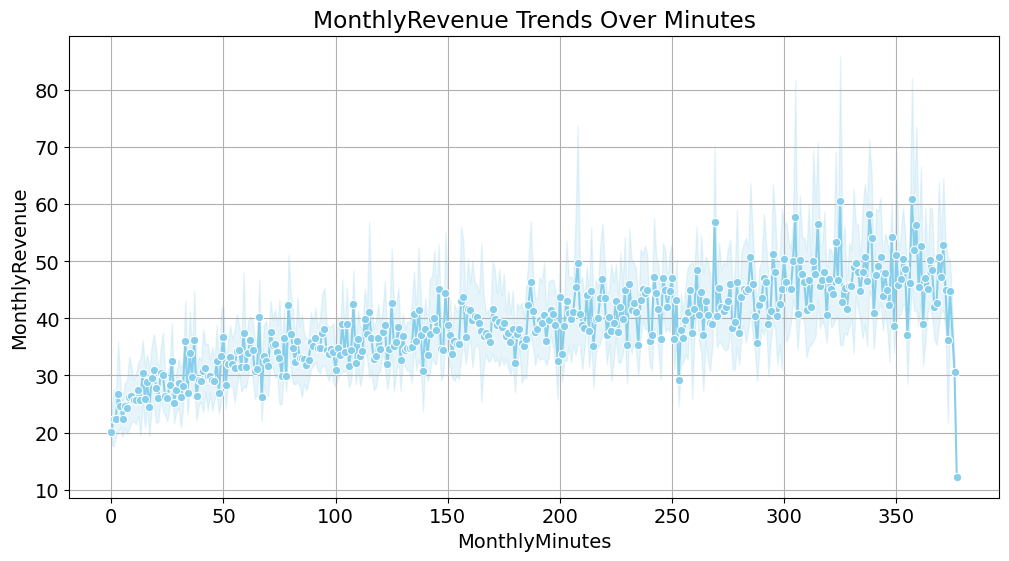

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(x='MonthlyMinutes', y='MonthlyRevenue', data=custX0, marker='o', color='skyblue')
plt.title('MonthlyRevenue Trends Over Minutes')
plt.xlabel('MonthlyMinutes')
plt.ylabel('MonthlyRevenue')
plt.grid(True)
plt.show()


Interpretaion:-
**custX0** : Moderate users with average monthly revenue, minutes, and age. A balanced customer segment that may benefit from loyalty programs and personalized plans for retention.

**custX1** : High revenue and usage customers, skewing towards premium services. Opportunities lie in offering exclusive features, high-speed data, and enticing promotions for long-term commitments.

**custX2** : Moderate revenue and usage customers, emphasizing value for money. Targeting family plans, bundle deals, and promotions could attract and retain this segment.

**custX3** : High revenue and very high usage customers. Tailoring premium, unlimited plans with superior network quality and special promotions may enhance customer satisfaction and revenue generation.

#### Cluster 2

#### Exploring Telecom Customer Characteristics: Monthly Revenue, Overage Minutes, and AgeHH1 Analysis

In [42]:
Y=data[["MonthlyRevenue","OverageMinutes","AgeHH1"]]
Y

,MonthlyRevenue,OverageMinutes,AgeHH1
0,57.49,23.0,30
1,55.23,0.0,56
2,97.34,420.0,38
3,35.59,16.0,46
4,55.27,0.0,58
...,...,...,...
19994,0.00,0.0,46
19995,85.15,1.0,64
19996,0.00,0.0,34
19998,0.00,0.0,28


In [43]:
import numpy as np
from scipy import stats
z_scores = np.abs(stats.zscore(Y))
z_score_threshold = 3
outliers_mask = (z_scores > z_score_threshold).any(axis=1)
print("Rows with outliers:")
print(Y[outliers_mask])
Y = Y[~outliers_mask]
# #  Replace outliers with the median (or another value)
# Y = Y.copy()
# Y[outliers_mask] = Y.median()
# #  Apply a transformation (e.g., log transformation) to reduce the impact of outliers
# Y = np.log1p(Y)
print("Data with outliers removed:")
print(Y)
# # or
# print("Data with outliers handled:")
# print(Y_handled_outliers)
# # or
# print("Data with log transformation:")
# print(Y)


Rows with outliers:
       MonthlyRevenue  OverageMinutes  AgeHH1
2               97.34           420.0      38
60             202.48           505.0      36
67             213.35           228.0      52
73             122.78           358.0      38
81             196.28           473.0      36
...               ...             ...     ...
19836          193.96           429.0      38
19913          373.21             2.0      50
19926          320.56           798.0      22
19932          321.35           630.0      50
19934          232.03           546.0      50

[450 rows x 3 columns]
Data with outliers removed:
       MonthlyRevenue  OverageMinutes  AgeHH1
0               57.49            23.0      30
1               55.23             0.0      56
3               35.59            16.0      46
4               55.27             0.0      58
5               60.19             0.0      50
...               ...             ...     ...
19994            0.00             0.0      46
19995   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

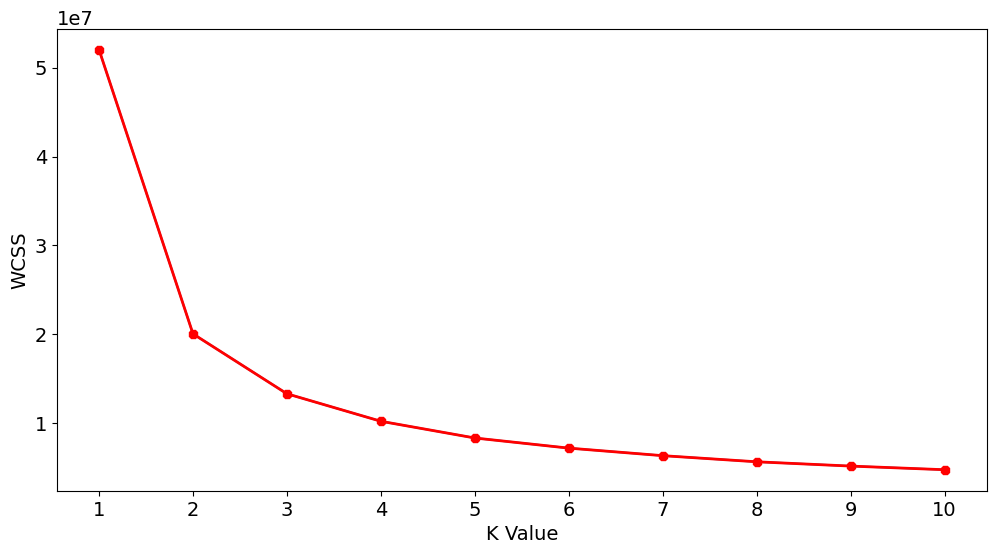

In [44]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(Y)
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [45]:
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(Y)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([3, 1, 1, ..., 1, 1, 1], dtype=int32)

In [46]:
# from sklearn.metrics import silhouette_score
# silhouette_avg = silhouette_score(Y, y_kmeans)
# print("Silhouette score:", silhouette_avg)

In [47]:
df_plot = Y
df_plot['cluster'] = y_kmeans
df_plot['CustomerID']=data['CustomerID']
df_plot

<ipython-input-47-d11e19d7519f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-d11e19d7519f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,MonthlyRevenue,OverageMinutes,AgeHH1,cluster,CustomerID
0,57.49,23.0,30,3,3000006
1,55.23,0.0,56,1,3000018
3,35.59,16.0,46,1,3000070
4,55.27,0.0,58,1,3000074
5,60.19,0.0,50,3,3000086
...,...,...,...,...,...
19994,0.00,0.0,46,1,3399930
19995,85.15,1.0,64,3,3399938
19996,0.00,0.0,34,1,3399950
19998,0.00,0.0,28,1,3399970


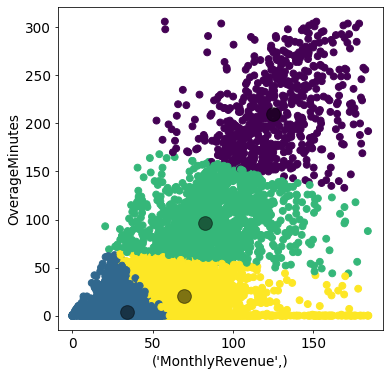

In [48]:
import matplotlib.pyplot as plt
df_scatter = np.array(df_plot)
plt.figure(figsize=(6, 6), dpi=70)
plt.scatter(Y['MonthlyRevenue'], Y['OverageMinutes'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='black', s=200, alpha=0.5, label ='centroid');
xlabel='MonthlyRevenue',
ylabel='OverageMinutes'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

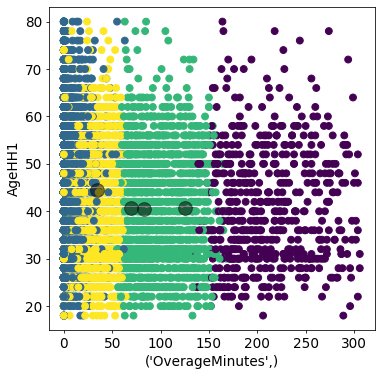

In [49]:
import matplotlib.pyplot as plt
df_scatter = np.array(df_plot)
plt.figure(figsize=(6, 6), dpi=70)
plt.scatter(Y['OverageMinutes'], Y['AgeHH1'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,2], c='black', s=200, alpha=0.5, label ='centroid');
xlabel='OverageMinutes',
ylabel='AgeHH1'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

In [50]:
import plotly.express as px
fig = px.scatter_3d(df_plot, x='MonthlyRevenue', y='OverageMinutes', z='AgeHH1', color='cluster', opacity=1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [53]:
custY0=df_plot[df_plot["cluster"]==0]
print('Number of customer in 0st group=', len(custY0))
print('They are -', custY0["CustomerID"].values)
print("--------------------------------------------")
custY1=df_plot[df_plot["cluster"]==1]
print('Number of customer in 1st group=', len(custY1))
print('They are -', custY1["CustomerID"].values)
print("--------------------------------------------")
custY2=df_plot[df_plot["cluster"]==2]
print('Number of customer in 2nd group=', len(custY2))
print('They are -', custY2["CustomerID"].values)
print("--------------------------------------------")
custY3=df_plot[df_plot["cluster"]==3]
print('Number of customer in 3rd group=', len(custY3))
print('They are -', custY3["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 0st group= 615
They are - [3000702 3000798 3001494 3001582 3002046 3002354 3002578 3003098 3003690
 3003834 3004110 3004262 3006142 3006606 3006794 3007546 3009386 3009938
 3010514 3012886 3014662 3015334 3016342 3016610 3017382 3018094 3019110
 3019438 3020202 3021170 3022106 3024318 3024526 3025106 3025758 3025870
 3026182 3026910 3027418 3027646 3027698 3028402 3028738 3028750 3028890
 3028946 3029078 3029702 3030934 3031142 3032650 3032774 3033574 3033922
 3033974 3034490 3035238 3035478 3035706 3036194 3037470 3037550 3038070
 3040078 3040654 3040894 3041094 3041450 3041734 3043126 3044122 3044422
 3045666 3047702 3047870 3048346 3048862 3051314 3051822 3052194 3052962
 3053438 3053626 3053998 3054046 3055482 3055706 3056430 3057354 3057478
 3057486 3059586 3060270 3060622 3061550 3062486 3062630 3062818 3064974
 3065334 3065418 3065422 3066282 3066314 3066794 3066810 3067650 3068330
 3068878 3069530 3069678 3070158 3072262 3073122 3074034 3074230 3074714
 30

In [54]:
custY1.shape

(8439, 5)

In [55]:
descriptive_stats = custY1[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].describe()
print(descriptive_stats)

       MonthlyRevenue  OverageMinutes       AgeHH1
count     8439.000000      8439.00000  8439.000000
mean        33.941123         3.71928    44.480507
std         11.825392         8.13076    12.294514
min          0.000000         0.00000    18.000000
25%         29.990000         0.00000    34.000000
50%         34.380000         0.00000    44.000000
75%         41.030000         3.00000    52.000000
max         60.240000        63.00000    80.000000


In [56]:
mean_values = custY1[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].mean()
median_values = custY1[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].median()
std_dev_values = custY1[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].std()
min_values = custY1[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].min()
max_values = custY1[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].max()
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard deviation values:\n", std_dev_values)
print("\nMinimum values:\n", min_values)
print("\nMaximum values:\n", max_values)

Mean values:
 MonthlyRevenue    33.941123
OverageMinutes     3.719280
AgeHH1            44.480507
dtype: float64

Median values:
 MonthlyRevenue    34.38
OverageMinutes     0.00
AgeHH1            44.00
dtype: float64

Standard deviation values:
 MonthlyRevenue    11.825392
OverageMinutes     8.130760
AgeHH1            12.294514
dtype: float64

Minimum values:
 MonthlyRevenue     0.0
OverageMinutes     0.0
AgeHH1            18.0
dtype: float64

Maximum values:
 MonthlyRevenue    60.24
OverageMinutes    63.00
AgeHH1            80.00
dtype: float64


**Characteristics**: Customers with relatively low MonthlyRevenue, minimal OverageMinutes, and a middle-aged demographic.
**Strategies**:
**Affordable Plans**: Emphasize cost-effective plans, with a focus on low overage charges.
Retention Discounts: Introduce discounts for loyal customers and encourage referrals.
Value-Added Services: Offer additional services without significantly increasing the monthly cost.

In [57]:
mean_values = custY3[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].mean()
median_values = custY3[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].median()
std_dev_values = custY3[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].std()
min_values = custY3[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].min()
max_values = custY3[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].max()
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard deviation values:\n", std_dev_values)
print("\nMinimum values:\n", min_values)
print("\nMaximum values:\n", max_values)

Mean values:
 MonthlyRevenue    69.692170
OverageMinutes    20.378963
AgeHH1            40.792795
dtype: float64

Median values:
 MonthlyRevenue    63.73
OverageMinutes    17.00
AgeHH1            40.00
dtype: float64

Standard deviation values:
 MonthlyRevenue    21.773379
OverageMinutes    19.672562
AgeHH1            11.241268
dtype: float64

Minimum values:
 MonthlyRevenue    29.64
OverageMinutes     0.00
AgeHH1            18.00
dtype: float64

Maximum values:
 MonthlyRevenue    184.23
OverageMinutes     64.00
AgeHH1             80.00
dtype: float64


**Characteristics:** Customers with moderate MonthlyRevenue, substantial OverageMinutes, and a diverse age group.
Strategies:
**Customized Plans**: Tailor plans to accommodate varied usage patterns, offering flexibility and personalized options.
**Data Bundles**: Introduce data bundles or unlimited plans to cater to higher usage needs.
Targeted Promotions: Launch targeted promotions for specific age groups within the cluster.

In [58]:
mean_values = custY2[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].mean()
median_values = custY2[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].median()
std_dev_values = custY2[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].std()
min_values = custY2[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].min()
max_values = custY2[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].max()
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard deviation values:\n", std_dev_values)
print("\nMinimum values:\n", min_values)
print("\nMaximum values:\n", max_values)

Mean values:
 MonthlyRevenue    82.393093
OverageMinutes    96.002460
AgeHH1            40.538130
dtype: float64

Median values:
 MonthlyRevenue    79.34
OverageMinutes    90.00
AgeHH1            40.00
dtype: float64

Standard deviation values:
 MonthlyRevenue    24.317197
OverageMinutes    26.265461
AgeHH1            11.501388
dtype: float64

Minimum values:
 MonthlyRevenue    20.36
OverageMinutes    44.00
AgeHH1            18.00
dtype: float64

Maximum values:
 MonthlyRevenue    183.88
OverageMinutes    168.00
AgeHH1             80.00
dtype: float64


**Characteristics**: Customers with higher MonthlyRevenue, significantly high OverageMinutes, and a diverse age group.
**Strategies**:
Premium Plans: Develop premium plans with high data limits and exclusive features.
VIP Customer Service: Provide priority customer service for this high-revenue segment.
Content Partnerships: Collaborate with content providers for exclusive offerings to attract this user base.

In [59]:
mean_values = custY0[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].mean()
median_values = custY0[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].median()
std_dev_values = custY0[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].std()
min_values = custY0[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].min()
max_values = custY0[['MonthlyRevenue', 'OverageMinutes', 'AgeHH1']].max()
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard deviation values:\n", std_dev_values)
print("\nMinimum values:\n", min_values)
print("\nMaximum values:\n", max_values)

Mean values:
 MonthlyRevenue    124.881610
OverageMinutes    210.169106
AgeHH1             40.637398
dtype: float64

Median values:
 MonthlyRevenue    123.52
OverageMinutes    204.00
AgeHH1             38.00
dtype: float64

Standard deviation values:
 MonthlyRevenue    24.951143
OverageMinutes    41.176319
AgeHH1            11.944234
dtype: float64

Minimum values:
 MonthlyRevenue     52.3
OverageMinutes    133.0
AgeHH1             18.0
dtype: float64

Maximum values:
 MonthlyRevenue    184.08
OverageMinutes    306.00
AgeHH1             80.00
dtype: float64


New Cluster 3



In [60]:
data['ServiceArea'].unique()

array(['MILMIL414', 'NNYSYR315', 'SLCSLC801', 'OKCTUL918', 'SEAPOR503',
       'PITHOM412', 'SANMCA210', 'KCYKCK913', 'DENDEN303', 'OKCLRK501',
       'SANAUS512', 'NSHNSH615', 'KCYWIC316', 'KCYKCM816', 'DALSHR903',
       'DALFTW817', 'NYCMAN917', 'MINMIN612', 'DALDAL214', 'OMAOMA402',
       'SANSAN210', 'SANGEO512', 'STLSTL314', 'PHXPHX602', 'INDIND317',
       'LOULOU502', 'OKCOKC405', 'MIAMIA305', 'NOLKEN504', 'MIADFD954',
       'PHIMER609', 'SEASEA206', 'MIAHWD954', 'PHIPHI215', 'SEAEVE425',
       'MIAWPB561', 'MIANDA305', 'MIAFTL954', 'MIADEL561', 'NNYROC716',
       'PHIARD610', 'OMAGRN515', 'BIRBIR205', 'NYCQUE917', 'DETTOL419',
       'PHIJEN215', 'MINSTP612', 'SEABLV425', 'NNYBUF716', 'NYCBRO917',
       'NNYALB518', 'DETDET313', 'NYCNAS516', 'NYCNEW201', 'STLCOL618',
       'SFRPAL650', 'SFRSFR415', 'SFRSMO650', 'OMAIWC319', 'NYCWHI914',
       'SFROAK510', 'OMADES515', 'NYCSUF516', 'PHXTUC520', 'DETPON248',
       'BOSBOS617', 'SFRSCL408', 'PHICHC215', 'HARHAR860', 'BOSB

In [61]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['ServiceArea'] = label_encoder.fit_transform(data['ServiceArea'])

In [62]:
data['ServiceArea'].unique()

array([299, 370, 603, 476, 555, 516, 532, 221, 120, 469, 523, 383, 227,
       222, 115, 110, 393, 305, 106, 485, 534, 527, 616, 508, 203, 271,
       473, 283, 373, 276, 496, 558, 279, 500, 550, 291, 285, 277, 275,
       369, 486, 481,  73, 403, 140, 495, 306, 545, 366, 387, 365, 130,
       395, 396, 607, 578, 582, 584, 482, 406, 576, 480, 404, 510, 137,
        76, 581, 490, 182,  75, 187, 138, 136, 272, 479,  78, 561,  30,
       525, 577, 514, 281,  38,  41, 521,  81, 186, 541, 549,  84, 123,
       226, 398,  77, 126, 560,  83, 602, 397, 184, 491, 580, 284, 585,
       108, 270, 399, 278, 557, 218,  33, 185, 487, 290, 600, 535, 173,
       368, 143, 156, 154, 343, 159, 149, 165, 119, 431, 326, 183, 194,
       150, 269,  50,  59, 189, 429, 167, 118, 425, 432, 122, 315, 288,
       267, 519, 190, 382,  56, 308, 430, 520, 157,  79, 164, 548, 504,
        95, 313,  48,  88,  99, 162, 428, 543,  89, 418, 151,  60, 433,
        46, 606, 511, 424,  45,  94,  96, 193, 445, 268, 176, 43

In [63]:
correlation = data['ServiceArea'].corr(data['MonthlyMinutes'])

In [64]:
correlation

-0.0032244380607137084

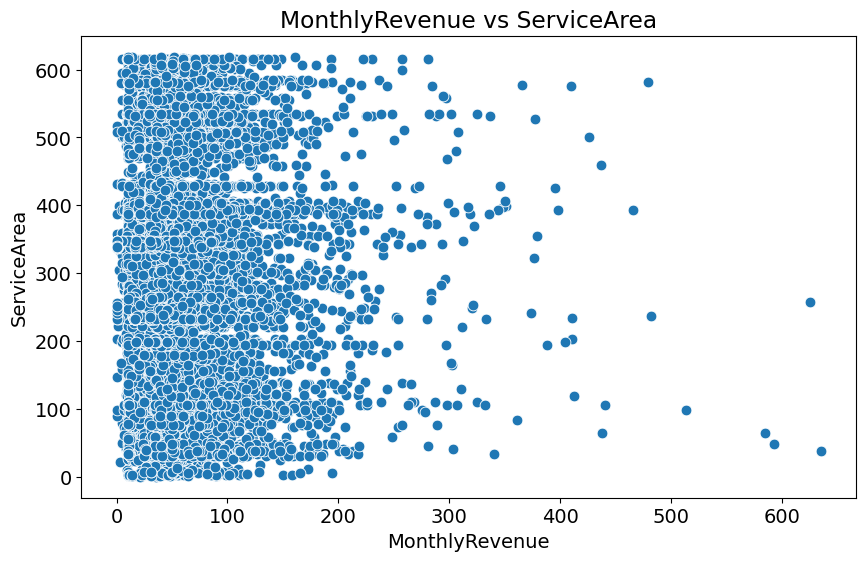

In [65]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'MonthlyRevenue',y = 'ServiceArea',  data = data  ,s = 60 )
plt.xlabel('MonthlyRevenue')
plt.ylabel('ServiceArea')
plt.title('MonthlyRevenue vs ServiceArea')
plt.show()

In [66]:
Z=data[['MonthlyRevenue','ServiceArea']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

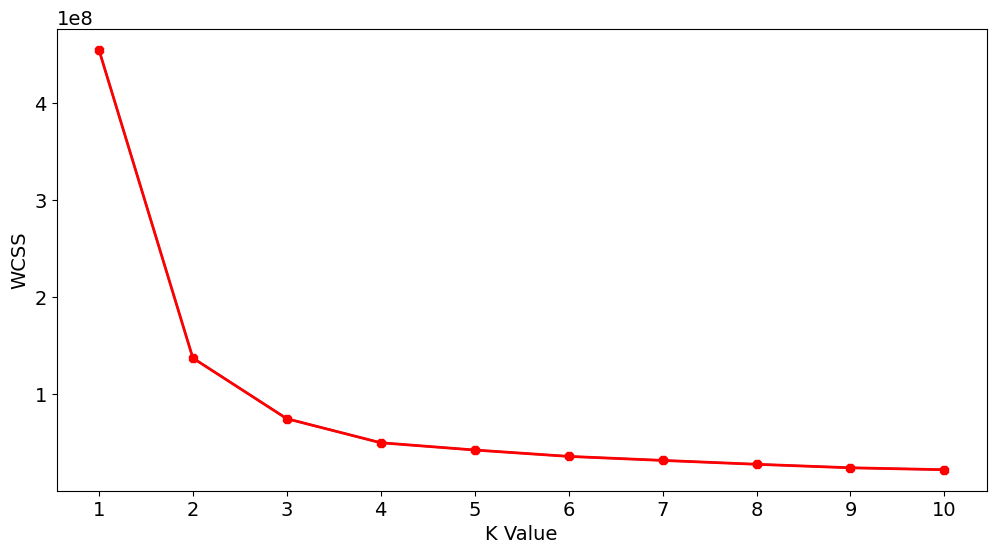

In [67]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(Z)
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [68]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(Z)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [69]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(Z, y_kmeans)
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.5441416772658499


<ipython-input-70-b9d3868f0a3e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-70-b9d3868f0a3e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



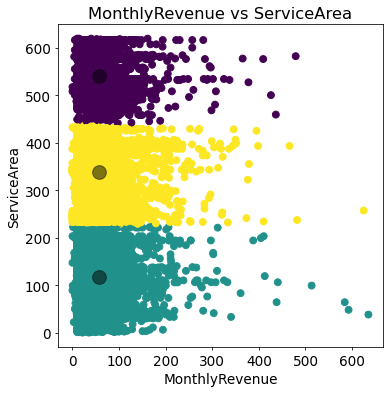

In [70]:
df_plot = Z
df_plot['cluster'] = y_kmeans
df_plot['CustomerID']=data['CustomerID']
df_plot

import matplotlib.pyplot as plt
df_scatter = np.array(df_plot)
plt.figure(figsize=(6, 6), dpi=70)
plt.scatter(df_scatter[:,0], df_scatter[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='black', s=200, alpha=0.5, label ='centroid');
plt.xlabel('MonthlyRevenue')
plt.ylabel('ServiceArea')
plt.title('MonthlyRevenue vs ServiceArea')
plt.show()

In [71]:
#pip install category_encoders


In [72]:
Z_New=data[['MonthlyRevenue','ServiceArea']]
Z_New

,MonthlyRevenue,ServiceArea
0,57.49,299
1,55.23,370
2,97.34,299
3,35.59,603
4,55.27,476
...,...,...
19994,0.00,241
19995,85.15,265
19996,0.00,256
19998,0.00,245


-0.7171686318589396


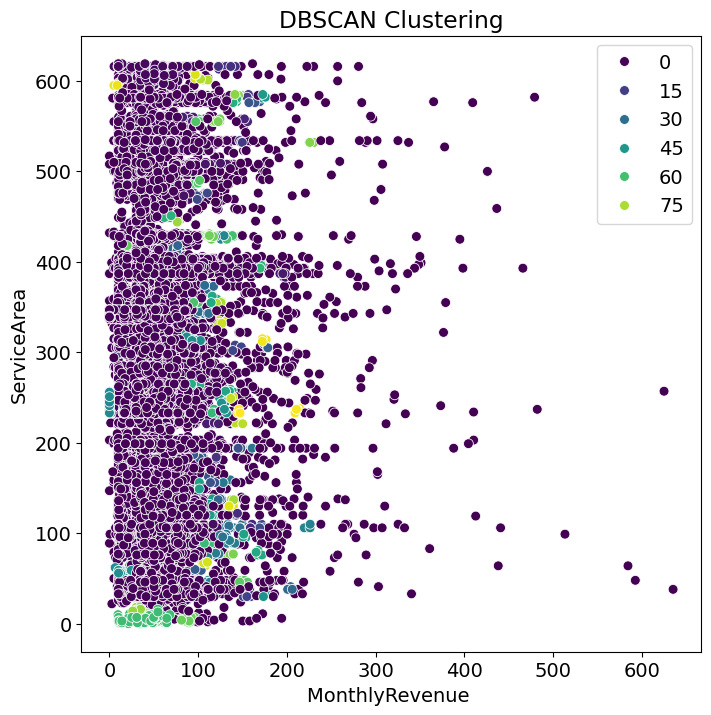

In [98]:
# DBSCAN Clustering
X = Z_New[['MonthlyRevenue','ServiceArea']]
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=5,min_samples=4)

model=dbscan.fit(X)

labels=model.labels_


from sklearn import metrics


sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True
n_clusters=len(set(labels))- (1 if -1 in labels else 0)
print(metrics.silhouette_score(X,labels))
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.scatterplot(x=Z_New['MonthlyRevenue'], y=Z_New['ServiceArea'], hue=labels, palette='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('MonthlyRevenue ')
plt.ylabel('ServiceArea')
plt.legend()
plt.show()

In [74]:
data2=data.copy()

CLUSTER 4


In [75]:
V=data[['AgeHH1','AgeHH2','ChildrenInHH','MaritalStatus','MonthlyMinutes']]
V

,AgeHH1,AgeHH2,ChildrenInHH,MaritalStatus,MonthlyMinutes
0,30,0,No,No,483.0
1,56,0,No,No,570.0
2,38,24,No,Yes,1039.0
3,46,0,Yes,No,153.0
4,58,0,No,No,1213.0
...,...,...,...,...,...
19994,46,0,No,No,0.0
19995,64,64,No,Unknown,815.0
19996,34,26,No,Yes,0.0
19998,28,48,No,Unknown,0.0


In [76]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
V['ChildrenInHH'] = label_encoder.fit_transform(V['ChildrenInHH'])
V['MaritalStatus'] = label_encoder.fit_transform(V['MaritalStatus'])

<ipython-input-76-d6a6f4d748ab>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-76-d6a6f4d748ab>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
V

,AgeHH1,AgeHH2,ChildrenInHH,MaritalStatus,MonthlyMinutes
0,30,0,0,0,483.0
1,56,0,0,0,570.0
2,38,24,0,2,1039.0
3,46,0,1,0,153.0
4,58,0,0,0,1213.0
...,...,...,...,...,...
19994,46,0,0,0,0.0
19995,64,64,0,1,815.0
19996,34,26,0,2,0.0
19998,28,48,0,1,0.0


In [78]:
V.drop(V[V['AgeHH1'] == 0].index, inplace=True)
V.drop(V[V['AgeHH2'] == 0].index, inplace=True)


<ipython-input-78-abdd10c0403e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-abdd10c0403e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
import pandas as pd
integer_columns = ['AgeHH1', 'AgeHH2', 'ChildrenInHH','MaritalStatus','MonthlyMinutes']
V[integer_columns] = V[integer_columns].astype(float)


<ipython-input-79-ccc144776c94>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
V.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9809 entries, 2 to 19999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AgeHH1          9809 non-null   float64
 1   AgeHH2          9809 non-null   float64
 2   ChildrenInHH    9809 non-null   float64
 3   MaritalStatus   9809 non-null   float64
 4   MonthlyMinutes  9809 non-null   float64
dtypes: float64(5)
memory usage: 459.8 KB


In [81]:
# from sklearn.preprocessing import StandardScaler
# numeric_columns = V.select_dtypes(include=['float64', 'int64']).columns
# scaler = StandardScaler()
# V[numeric_columns] = scaler.fit_transform(V[numeric_columns])
# V

In [82]:
V.shape

(9809, 5)

In [83]:
from sklearn.decomposition import PCA

Convert 4D to 2D with PCA

In [84]:
pca=PCA(n_components=2)

In [85]:
pca_scal=pca.fit_transform(V)
pca_scal.shape

(9809, 2)

In [86]:
pca_scal

array([[ 579.65802983,  -17.02982301],
       [ 964.51454197,   14.2783462 ],
       [ -53.45916932,    6.29566818],
       ...,
       [-459.32600567,  -22.81466031],
       [-459.38990892,   -9.09738317],
       [-459.49450254,   12.79101395]])

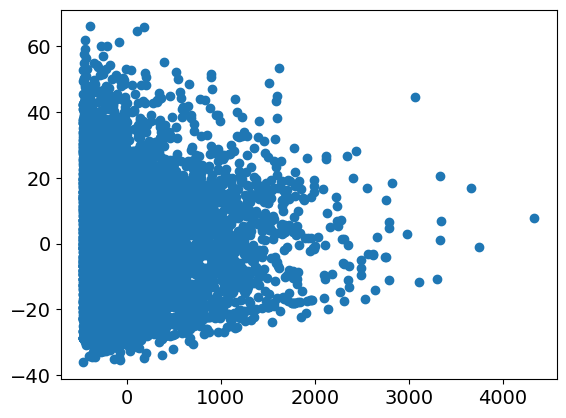

In [87]:
plt.scatter(pca_scal[:,0],pca_scal[:,1])

**Why PCA:**
PCA is used for dimensionality reduction. When dealing with datasets with many features, PCA helps in capturing the most significant variations in the data and reducing it to a lower-dimensional space. This can be beneficial for visualization, speeding up computation, and potentially improving the performance of clustering algorithms.

In this specific case, PCA is applied before hierarchical clustering to reduce the number of features from the original dataset, making it easier to visualize and potentially improving the clustering results. The reduced-dimensional representation provided by PCA may highlight underlying patterns in the data.

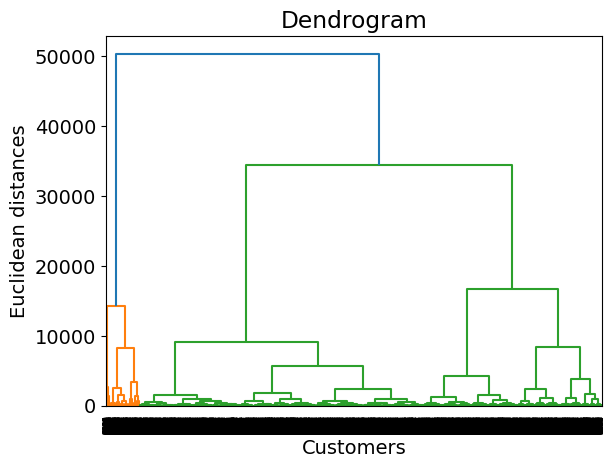

In [88]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(pca_scal, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [89]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(pca_scal)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



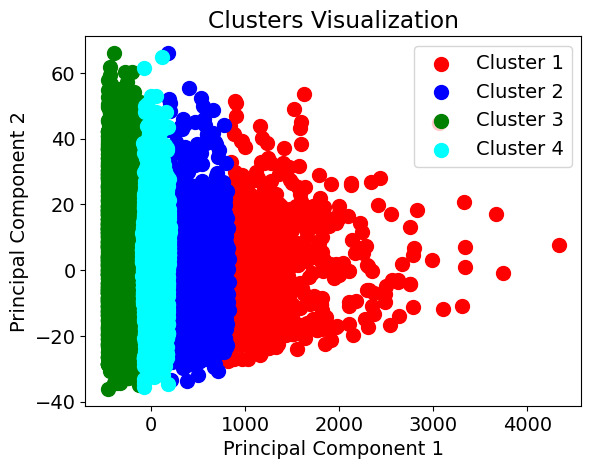

In [90]:
# Visualising the clusters
plt.scatter(pca_scal[y_hc == 0, 0], pca_scal[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_scal[y_hc == 1, 0], pca_scal[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_scal[y_hc == 2, 0], pca_scal[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(pca_scal[y_hc == 3, 0], pca_scal[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(pca_scal[y_hc == 4, 0], pca_scal[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [91]:
cluster_1 = V[y_hc == 0]
cluster_2 = V[y_hc == 1]
cluster_3 = V[y_hc == 2]
cluster_4 = V[y_hc == 3]


In [92]:
cluster_3

,AgeHH1,AgeHH2,ChildrenInHH,MaritalStatus,MonthlyMinutes
10,54.0,80.0,0.0,0.0,244.0
15,32.0,32.0,1.0,2.0,365.0
18,46.0,46.0,0.0,0.0,25.0
23,54.0,52.0,0.0,2.0,14.0
24,34.0,32.0,0.0,2.0,250.0
...,...,...,...,...,...
19984,58.0,30.0,0.0,0.0,0.0
19989,38.0,44.0,1.0,2.0,351.0
19996,34.0,26.0,0.0,2.0,0.0
19998,28.0,48.0,0.0,1.0,0.0


In [93]:
cluster_3.shape

(5607, 5)

In [94]:
descriptive_stats = cluster_3[['AgeHH1', 'AgeHH2', 'ChildrenInHH','MaritalStatus','MonthlyMinutes']].describe()
print(descriptive_stats)

            AgeHH1       AgeHH2  ChildrenInHH  MaritalStatus  MonthlyMinutes
count  5607.000000  5607.000000   5607.000000    5607.000000     5607.000000
mean     46.509363    44.514714      0.421794       1.530587      160.313715
std      11.984644    13.859422      0.493890       0.751322      108.283421
min      18.000000    18.000000      0.000000       0.000000        0.000000
25%      38.000000    34.000000      0.000000       1.000000       64.000000
50%      46.000000    44.000000      0.000000       2.000000      151.000000
75%      54.000000    54.000000      1.000000       2.000000      248.500000
max      98.000000    98.000000      1.000000       2.000000      385.000000


In [95]:
mean_values = cluster_3[['AgeHH1', 'AgeHH2', 'ChildrenInHH','MaritalStatus','MonthlyMinutes']].mean()
median_values = cluster_3[['AgeHH1', 'AgeHH2', 'ChildrenInHH','MaritalStatus','MonthlyMinutes']].median()
std_dev_values = cluster_3[['AgeHH1', 'AgeHH2', 'ChildrenInHH','MaritalStatus','MonthlyMinutes']].std()
min_values = cluster_3[['AgeHH1', 'AgeHH2', 'ChildrenInHH','MaritalStatus','MonthlyMinutes']].min()
max_values = cluster_3[['AgeHH1', 'AgeHH2', 'ChildrenInHH','MaritalStatus','MonthlyMinutes']].max()
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard deviation values:\n", std_dev_values)
print("\nMinimum values:\n", min_values)
print("\nMaximum values:\n", max_values)

Mean values:
 AgeHH1             46.509363
AgeHH2             44.514714
ChildrenInHH        0.421794
MaritalStatus       1.530587
MonthlyMinutes    160.313715
dtype: float64

Median values:
 AgeHH1             46.0
AgeHH2             44.0
ChildrenInHH        0.0
MaritalStatus       2.0
MonthlyMinutes    151.0
dtype: float64

Standard deviation values:
 AgeHH1             11.984644
AgeHH2             13.859422
ChildrenInHH        0.493890
MaritalStatus       0.751322
MonthlyMinutes    108.283421
dtype: float64

Minimum values:
 AgeHH1            18.0
AgeHH2            18.0
ChildrenInHH       0.0
MaritalStatus      0.0
MonthlyMinutes     0.0
dtype: float64

Maximum values:
 AgeHH1             98.0
AgeHH2             98.0
ChildrenInHH        1.0
MaritalStatus       2.0
MonthlyMinutes    385.0
dtype: float64


Customers in this cluster have an average AgeHH1 of 44.92 and AgeHH2 of 42.48, reflecting a relatively younger demographic compared to Cluster 3.

Similar to Cluster 3, the majority of households in this cluster do not have children (ChildrenInHH mean of 0.44).

MaritalStatus tends to be around 1.45, indicating a mix of single and married individuals.
The average MonthlyMinutes is significantly higher at 496.23, with a standard deviation of 80.35.

**Flexible Plans**: Offer flexible and customizable plans that cater to diverse marital status preferences , highlighting the benefits of services for individuals or couples without children.

**Communication Channels**: Utilize channels preferred by this age group, such as targeted social media campaigns and personalized email newsletters.

In [96]:
mean_values = cluster_4[['AgeHH1', 'AgeHH2', 'ChildrenInHH','MaritalStatus','MonthlyMinutes']].mean()
median_values = cluster_4[['AgeHH1', 'AgeHH2', 'ChildrenInHH','MaritalStatus','MonthlyMinutes']].median()
std_dev_values = cluster_4[['AgeHH1', 'AgeHH2', 'ChildrenInHH','MaritalStatus','MonthlyMinutes']].std()
min_values = cluster_4[['AgeHH1', 'AgeHH2', 'ChildrenInHH','MaritalStatus','MonthlyMinutes']].min()
max_values = cluster_4[['AgeHH1', 'AgeHH2', 'ChildrenInHH','MaritalStatus','MonthlyMinutes']].max()
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard deviation values:\n", std_dev_values)
print("\nMinimum values:\n", min_values)
print("\nMaximum values:\n", max_values)

Mean values:
 AgeHH1             44.924920
AgeHH2             42.478701
ChildrenInHH        0.444089
MaritalStatus       1.448349
MonthlyMinutes    496.226305
dtype: float64

Median values:
 AgeHH1             46.0
AgeHH2             44.0
ChildrenInHH        0.0
MaritalStatus       2.0
MonthlyMinutes    490.0
dtype: float64

Standard deviation values:
 AgeHH1            11.103869
AgeHH2            13.412966
ChildrenInHH       0.496997
MaritalStatus      0.782905
MonthlyMinutes    80.350222
dtype: float64

Minimum values:
 AgeHH1             18.0
AgeHH2             18.0
ChildrenInHH        0.0
MaritalStatus       0.0
MonthlyMinutes    365.0
dtype: float64

Maximum values:
 AgeHH1             90.0
AgeHH2             94.0
ChildrenInHH        1.0
MaritalStatus       2.0
MonthlyMinutes    657.0
dtype: float64


Customers in this cluster have an average AgeHH1 of 44.92 and AgeHH2 of 42.48, reflecting a relatively younger demographic compared to Cluster 3.

Similar to Cluster 3, the majority of households in this cluster do not have children (ChildrenInHH mean of 0.44).

MaritalStatus tends to be around 1.45, indicating a mix of single and married individuals.
The average MonthlyMinutes is significantly higher at 496.23, with a standard deviation of 80.35.

For cluster 1

Strategies to Target and Engage:

**Youth-Centric Marketing**: Develop marketing campaigns that appeal to a younger audience, emphasizing the dynamic and modern aspects of your telecom services.

**High-Volume Plans**: Offer plans with high monthly minutes to cater to the high usage patterns observed in this cluster.

**Family-Friendly Options:** Introduce family plans or promotions that consider households with and without children.

**Interactive Content:** Engage with the audience through interactive and multimedia content, leveraging social media and streaming platforms.

In [97]:
V['MaritalStatus'].unique

<bound method Series.unique of 2        2.0
5        2.0
8        2.0
10       0.0
11       2.0
        ... 
19991    0.0
19995    1.0
19996    2.0
19998    1.0
19999    2.0
Name: MaritalStatus, Length: 9809, dtype: float64>

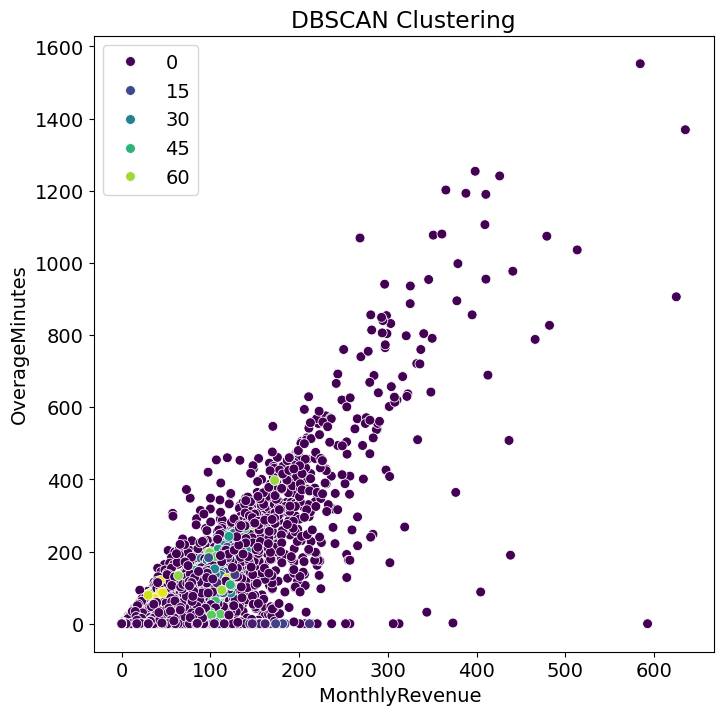

In [102]:
# DBSCAN Clustering
G = data[['OverageMinutes','MonthlyRevenue']]
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)

model=dbscan.fit(G)

labels=model.labels_


from sklearn import metrics


sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True
n_clusters=len(set(labels))- (1 if -1 in labels else 0)
print(metrics.silhouette_score(X,labels))
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.scatterplot(x=G['MonthlyRevenue'], y=G['OverageMinutes'], hue=labels, palette='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('MonthlyRevenue ')
plt.ylabel('OverageMinutes')
plt.legend()
plt.show()

Silhouette Score: 0.3926573546144533


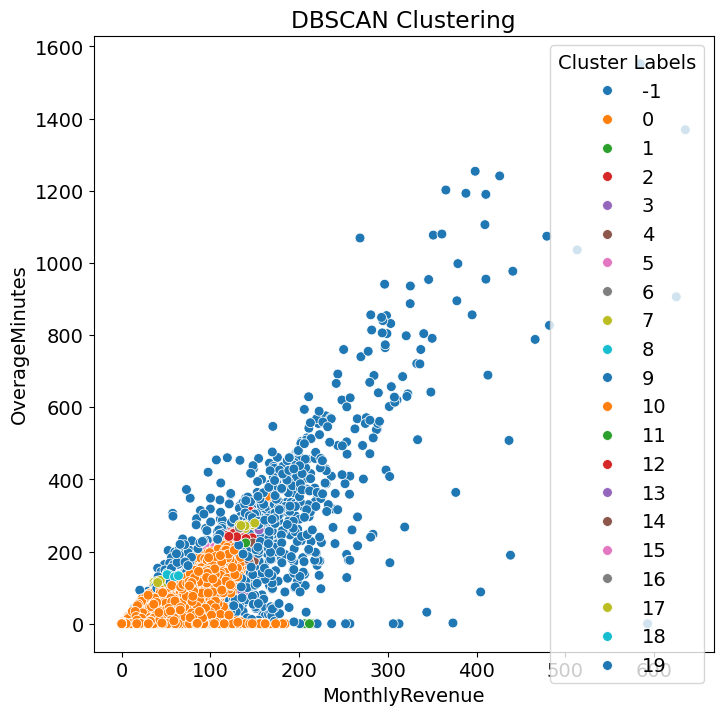

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Assuming 'data' contains your dataset
G = data[['OverageMinutes', 'MonthlyRevenue']]

# DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=5)
model = dbscan.fit(G)
labels = model.labels_

# Calculate silhouette score
silhouette_score = metrics.silhouette_score(G, labels)
print("Silhouette Score:", silhouette_score)

# Plotting the clusters
plt.figure(figsize=(8, 8))
sns.scatterplot(x=G['MonthlyRevenue'], y=G['OverageMinutes'], hue=labels, palette='tab10', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('MonthlyRevenue')
plt.ylabel('OverageMinutes')
plt.legend(loc='upper right', title='Cluster Labels')
plt.show()


In [105]:
# Create a DataFrame for each cluster
cluster_dataframes = {}
for cluster_label in np.unique(labels):
    if cluster_label == -1:
        continue  # Skip noise points
    cluster_dataframes[cluster_label] = G[labels == cluster_label]

# Print information about each cluster
for cluster_label, cluster_df in cluster_dataframes.items():
    print(f"Cluster {cluster_label}:\n{cluster_df}\n")

# Access a specific cluster DataFrame, for example, cluster 0
cluster_0_df = cluster_dataframes[0]
print("Cluster 0 DataFrame:")
print(cluster_0_df)


Cluster 0:
       OverageMinutes  MonthlyRevenue
0                23.0           57.49
1                 0.0           55.23
3                16.0           35.59
4                 0.0           55.27
5                 0.0           60.19
...               ...             ...
19994             0.0            0.00
19995             1.0           85.15
19996             0.0            0.00
19998             0.0            0.00
19999             0.0            0.00

[13725 rows x 2 columns]

Cluster 1:
       OverageMinutes  MonthlyRevenue
242               0.0          212.72
1144              0.0          210.39
2488              0.0          209.99
3627              0.0          206.14
8799              0.0          214.59
19615             0.0          211.56

Cluster 2:
       OverageMinutes  MonthlyRevenue
312             240.0          134.56
657             252.0          119.78
1278            256.0          124.99
1535            242.0          149.46
2877            256.0      

In [107]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [108]:
range_n_clusters = [2, 3, 4, 5, 6]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2 The average silhouette_score is : 0.8084370415168958


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 3 The average silhouette_score is : 0.7383844678375018


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 4 The average silhouette_score is : 0.6577231964491008


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 5 The average silhouette_score is : 0.6060616303577429


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 6 The average silhouette_score is : 0.5062660611050306


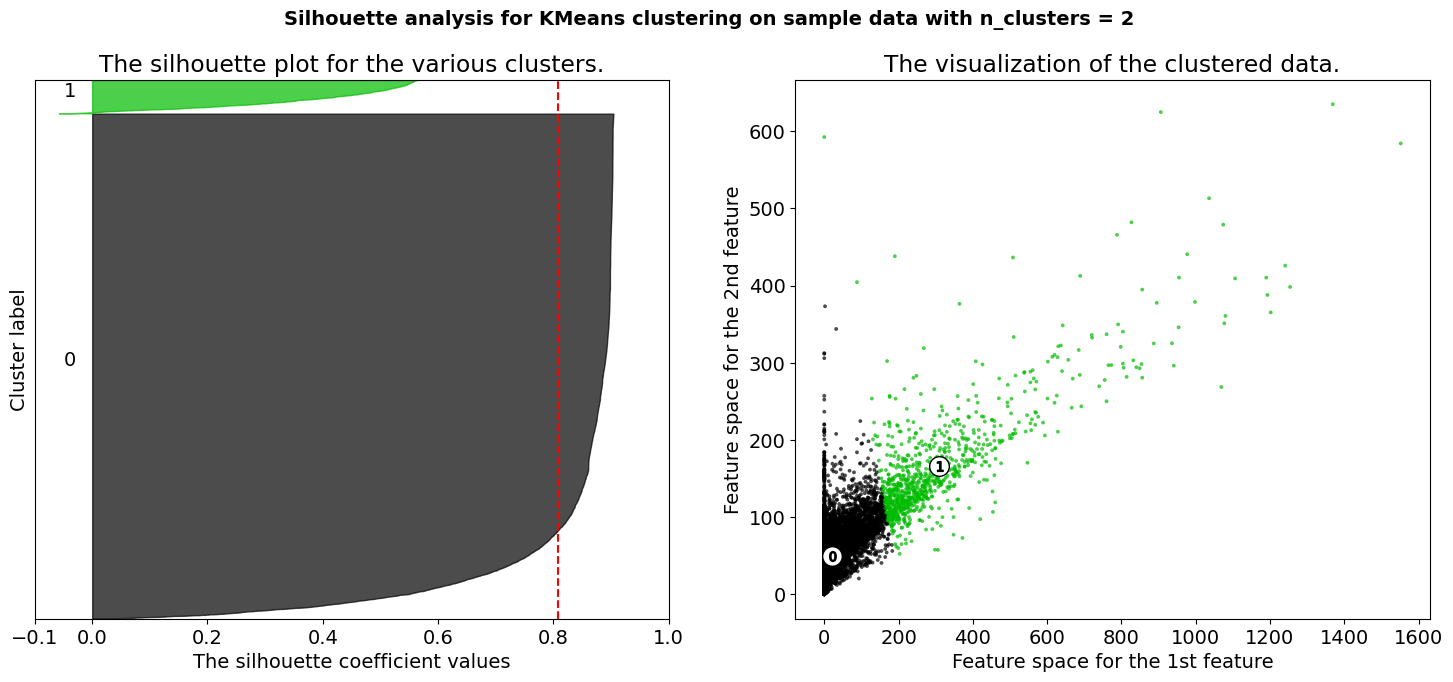

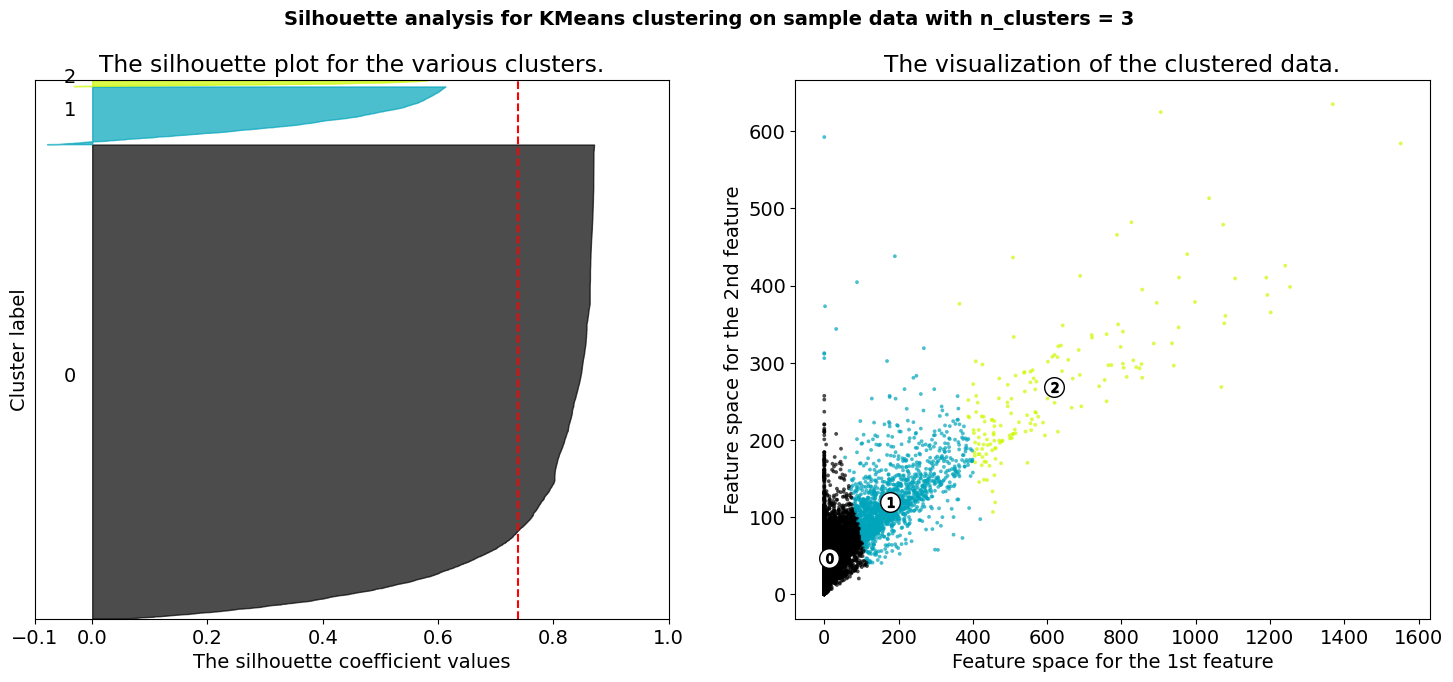

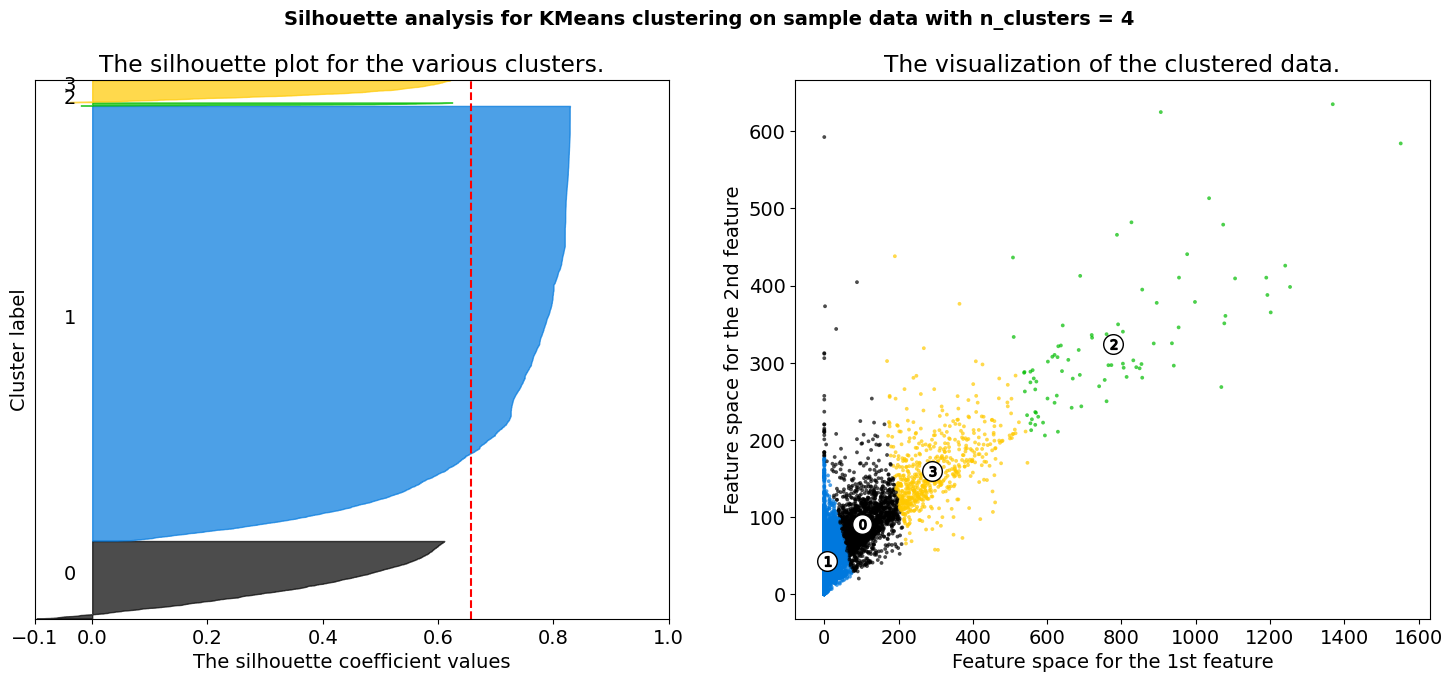

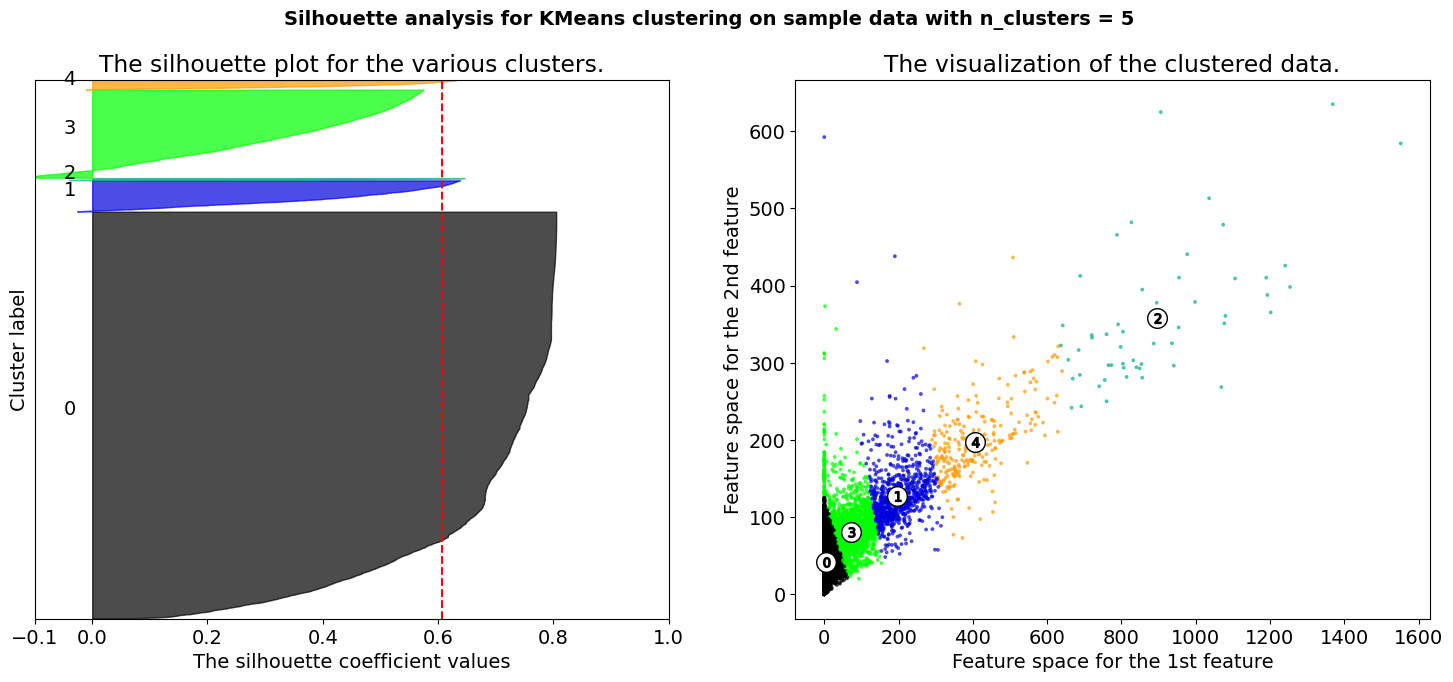

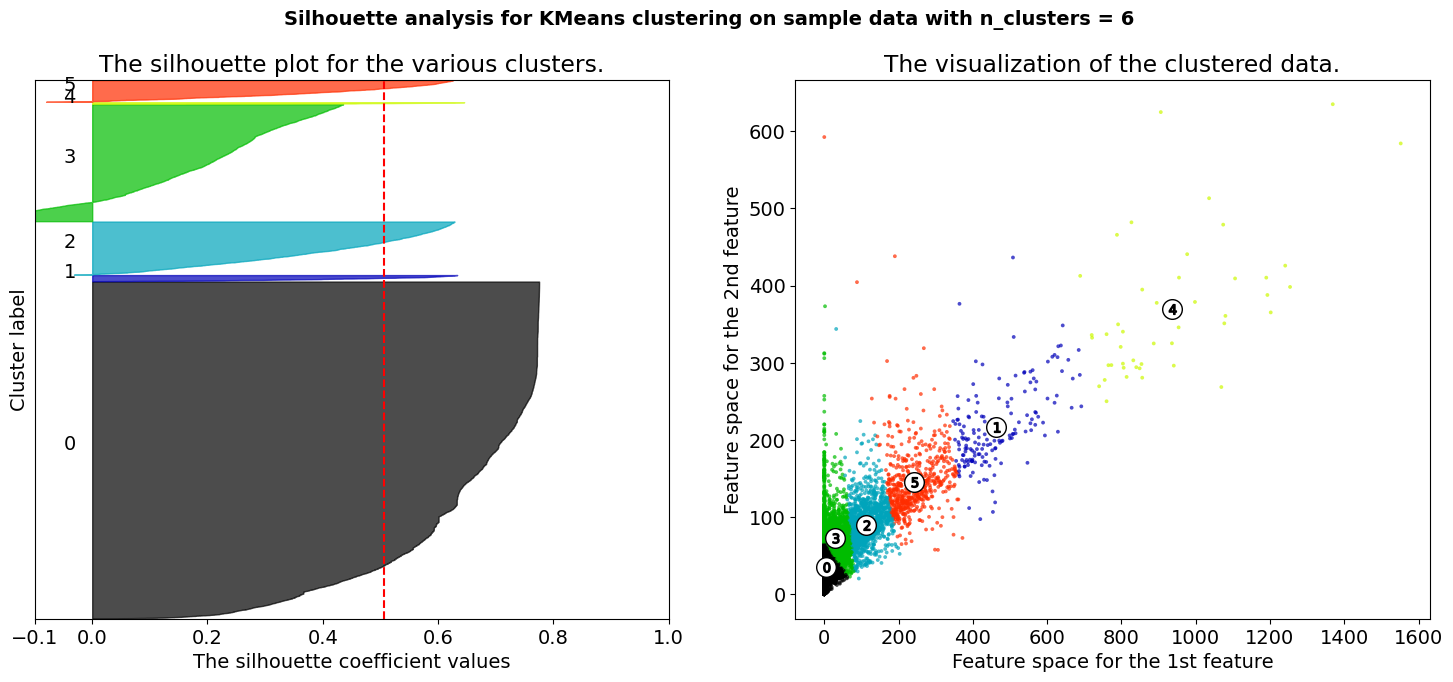

In [110]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(G) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(G)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(G, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(G, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(G['OverageMinutes'], G['MonthlyRevenue'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(G['OverageMinutes'], G['MonthlyRevenue'], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()